In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('Customers (1) (1).csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family Size,Spending_Category,Invoice_Number
0,1,Male,19,15000,39,Healthcare,1,4,Average,458984
1,2,Male,21,35000,81,Engineer,3,3,High,458994
2,3,Female,20,86000,6,Engineer,1,1,Low,458994
3,4,Female,23,59000,77,Lawyer,0,2,High,458997
4,5,Female,31,38000,40,Entertainment,2,6,Average,458999


In [5]:
data.shape

(2000, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         2000 non-null   int64 
 1   Gender             2000 non-null   object
 2   Age                2000 non-null   int64 
 3   Annual_Income      2000 non-null   int64 
 4   Spending_Score     2000 non-null   int64 
 5   Profession         1965 non-null   object
 6   Work_Experience    2000 non-null   int64 
 7   Family Size        2000 non-null   int64 
 8   Spending_Category  2000 non-null   object
 9   Invoice_Number     2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score,Work_Experience,Family Size,Invoice_Number
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500,461389.611000
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749,1529.636635
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,458984.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000,459890.500000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000,461425.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000,462654.750000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000,464252.000000


In [8]:
data.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual_Income         0
Spending_Score        0
Profession           35
Work_Experience       0
Family Size           0
Spending_Category     0
Invoice_Number        0
dtype: int64

In [9]:
data=data.dropna(subset=['Profession'])

In [10]:
data.isnull().sum()

CustomerID           0
Gender               0
Age                  0
Annual_Income        0
Spending_Score       0
Profession           0
Work_Experience      0
Family Size          0
Spending_Category    0
Invoice_Number       0
dtype: int64

In [11]:
list(data.columns)

['CustomerID',
 'Gender',
 'Age',
 'Annual_Income',
 'Spending_Score',
 'Profession',
 'Work_Experience',
 'Family Size',
 'Spending_Category',
 'Invoice_Number']

In [12]:
categorical_cols = ['Gender', 'Profession', 'Spending_Category']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [13]:
data

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family Size,Spending_Category,Invoice_Number
0,1,1,19,15000,39,5,1,4,0,458984
1,2,1,21,35000,81,2,3,3,1,458994
2,3,0,20,86000,6,2,1,1,2,458994
3,4,0,23,59000,77,7,0,2,1,458997
4,5,0,31,38000,40,3,2,6,0,458999
...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7,0,461768
1996,1997,0,91,73158,32,1,7,7,0,461773
1997,1998,1,87,90961,14,5,9,2,2,461774
1998,1999,1,77,182109,4,4,7,2,2,461775


In [14]:
x = data.drop('Spending_Category', axis=1)
y = data['Spending_Category']

In [15]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

In [17]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1572, 9), (393, 9), (1572,), (393,))

In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [19]:
accuracy_results = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    accuracy_results[name] = accuracy

In [20]:
accuracy_results_sorted = dict(sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True))

In [21]:
accuracy_results_sorted

{'Decision Tree': 1.0,
 'Random Forest': 1.0,
 'Gradient Boosting': 1.0,
 'Logistic Regression': 0.9847328244274809,
 'SVM': 0.9389312977099237,
 'KNN': 0.7913486005089059}

In [22]:
best_model = models['Decision Tree']
y_pred = best_model.predict(xtest)

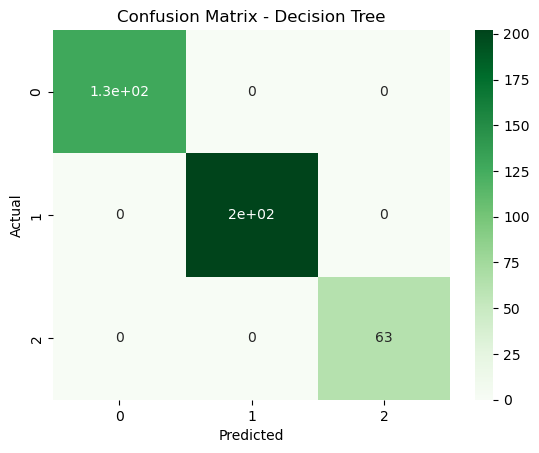

In [23]:
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()